In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
Data = pd.read_csv("train.csv")


In [3]:
Data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
Data.drop(columns=['PassengerId'], inplace=True)
Data.drop(columns=['Name'], inplace=True)
Data.drop(columns=['Ticket'], inplace=True)
Data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


In [6]:
Data = Data.reset_index(drop = True) 

In [7]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X= LabelEncoder()
Data['Sex']= LabelEncoder_X.fit_transform(Data['Sex'])
Data['Cabin']= LabelEncoder_X.fit_transform(Data['Cabin'])
Data['Age']= LabelEncoder_X.fit_transform(Data['Age'])
Data['Embarked']= LabelEncoder_X.fit_transform(Data['Embarked'])

In [8]:
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,28,1,0,7.2500,147,2
1,1,1,0,51,1,0,71.2833,81,0
2,1,3,0,34,0,0,7.9250,147,2
3,1,1,0,47,1,0,53.1000,55,2
4,0,3,1,47,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,13.0000,147,2
887,1,1,0,24,0,0,30.0000,30,2
888,0,3,0,88,1,2,23.4500,147,2
889,1,1,1,34,0,0,30.0000,60,0


In [9]:
from sklearn import preprocessing
X = Data.iloc[:, 1:]
Y = Data.iloc[:, 0]

In [10]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,28,1,0,7.2500,147,2
1,1,0,51,1,0,71.2833,81,0
2,3,0,34,0,0,7.9250,147,2
3,1,0,47,1,0,53.1000,55,2
4,3,1,47,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...
886,2,1,35,0,0,13.0000,147,2
887,1,0,24,0,0,30.0000,30,2
888,3,0,88,1,2,23.4500,147,2
889,1,1,34,0,0,30.0000,60,0


In [11]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [13]:
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,28,1,0,7.2500,147,2
1,1,1,0,51,1,0,71.2833,81,0
2,1,3,0,34,0,0,7.9250,147,2
3,1,1,0,47,1,0,53.1000,55,2
4,0,3,1,47,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,13.0000,147,2
887,1,1,0,24,0,0,30.0000,30,2
888,0,3,0,88,1,2,23.4500,147,2
889,1,1,1,34,0,0,30.0000,60,0


In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [15]:
predictions = model.predict(X_test)
print(predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0]


In [16]:
print(accuracy_score(Y_test, predictions))

0.8156424581005587


In [17]:
#prediction results(81.564%) suprisingly similar to Driverless AI(83.378% accuracy)

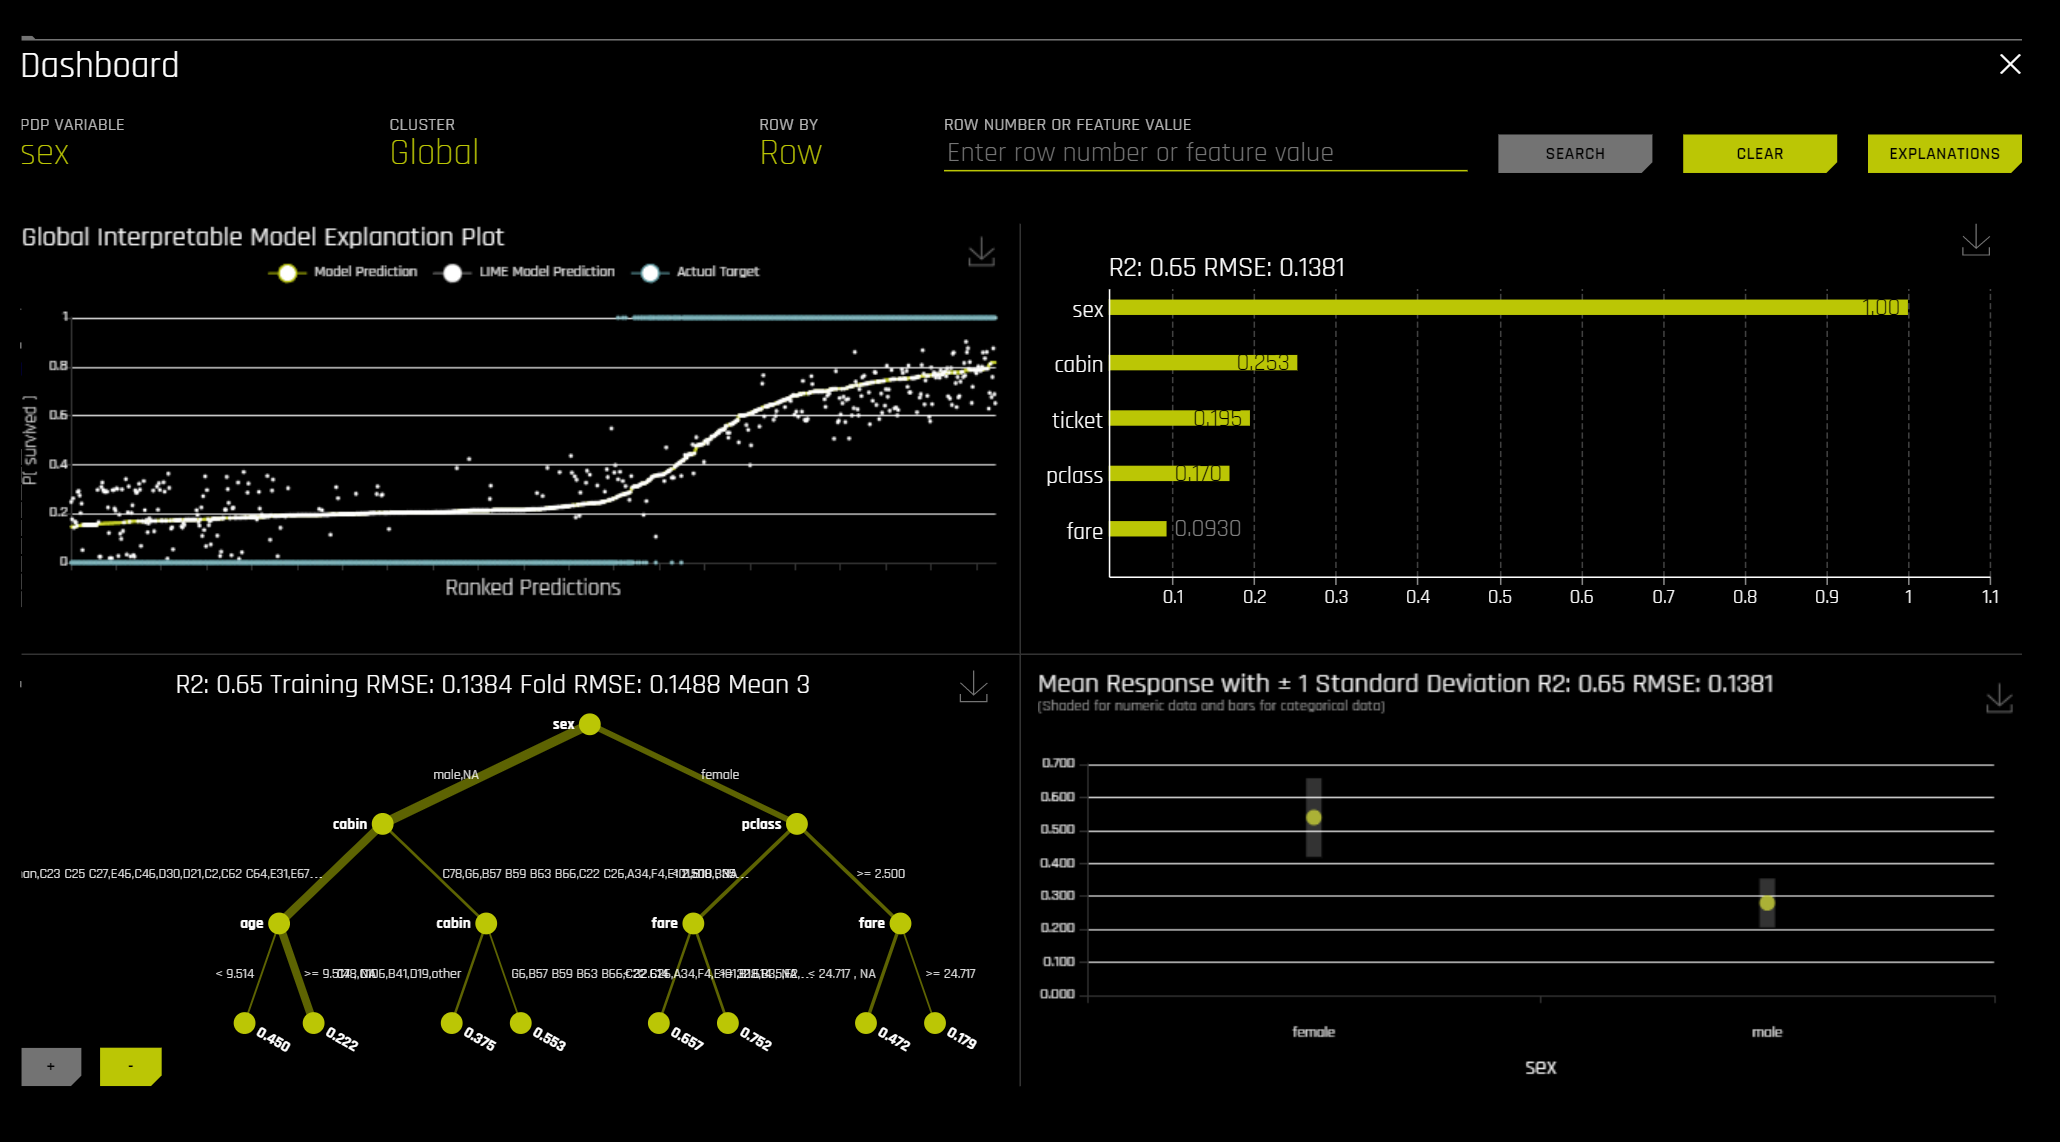

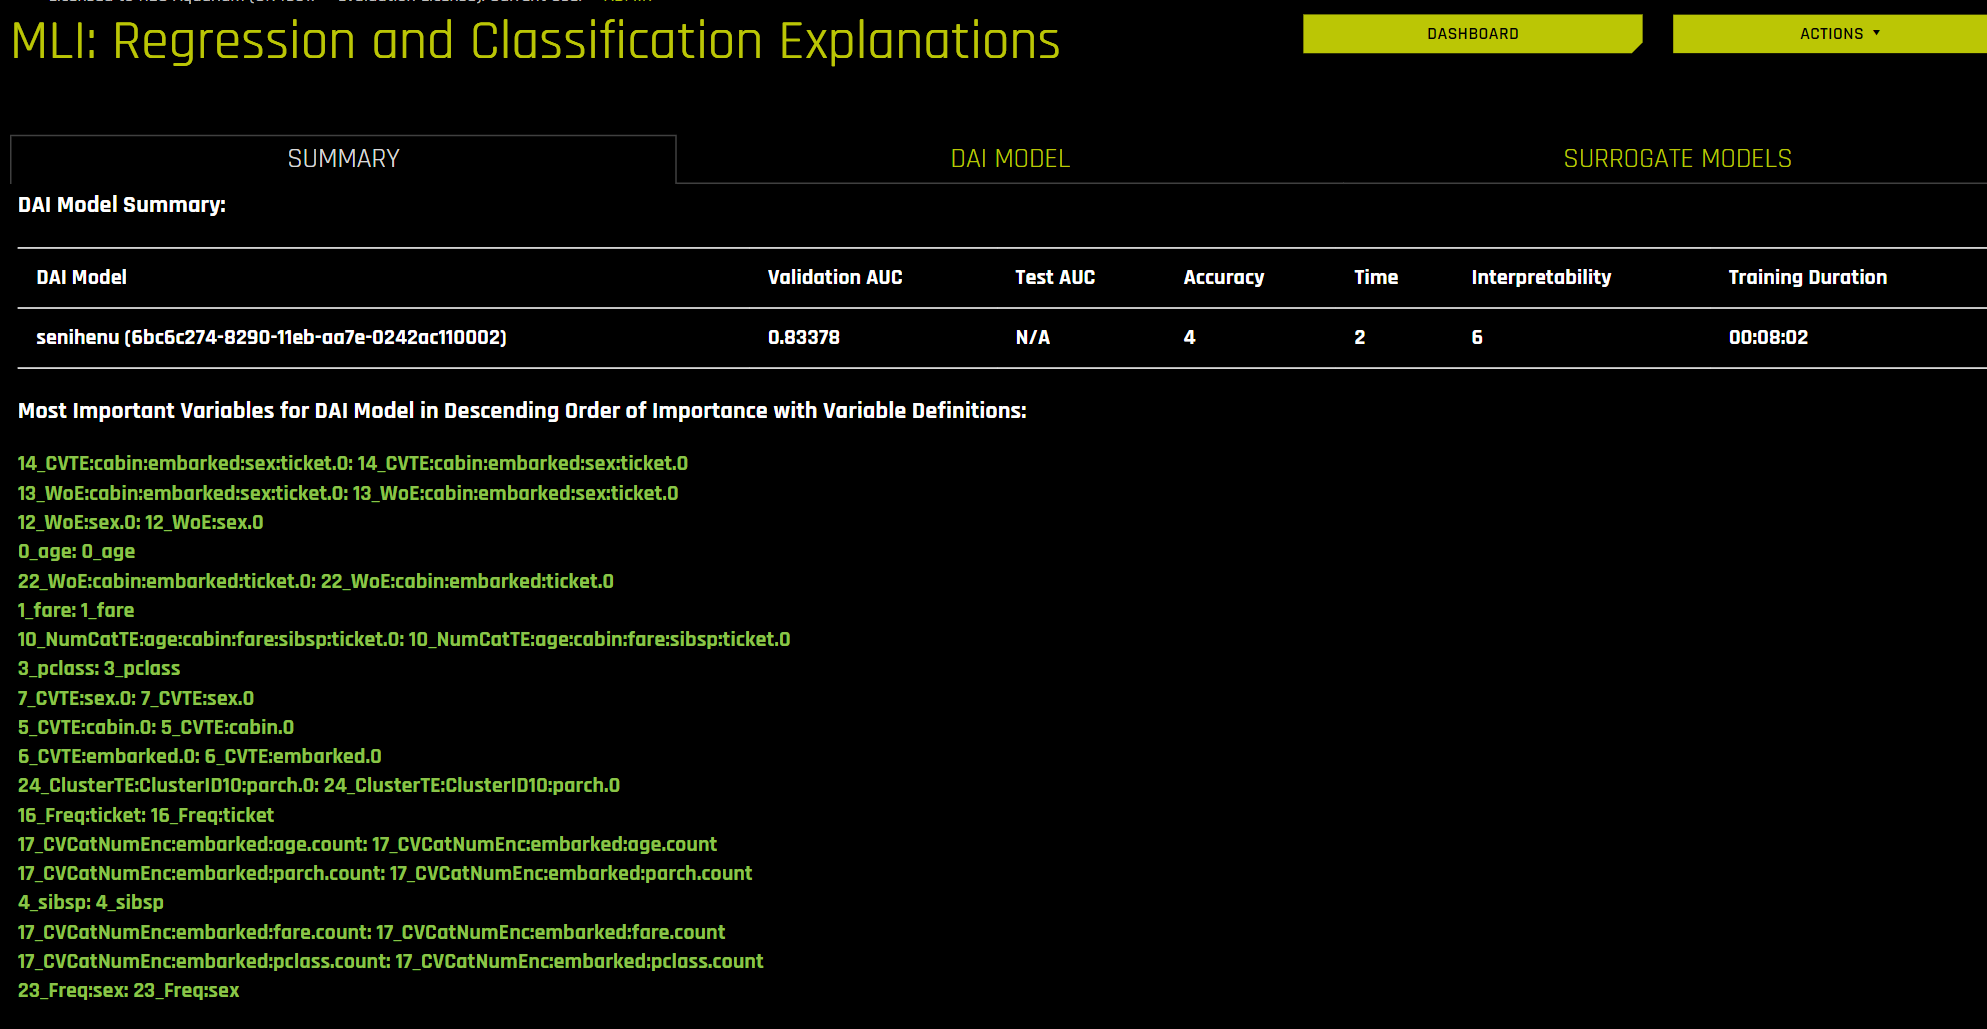

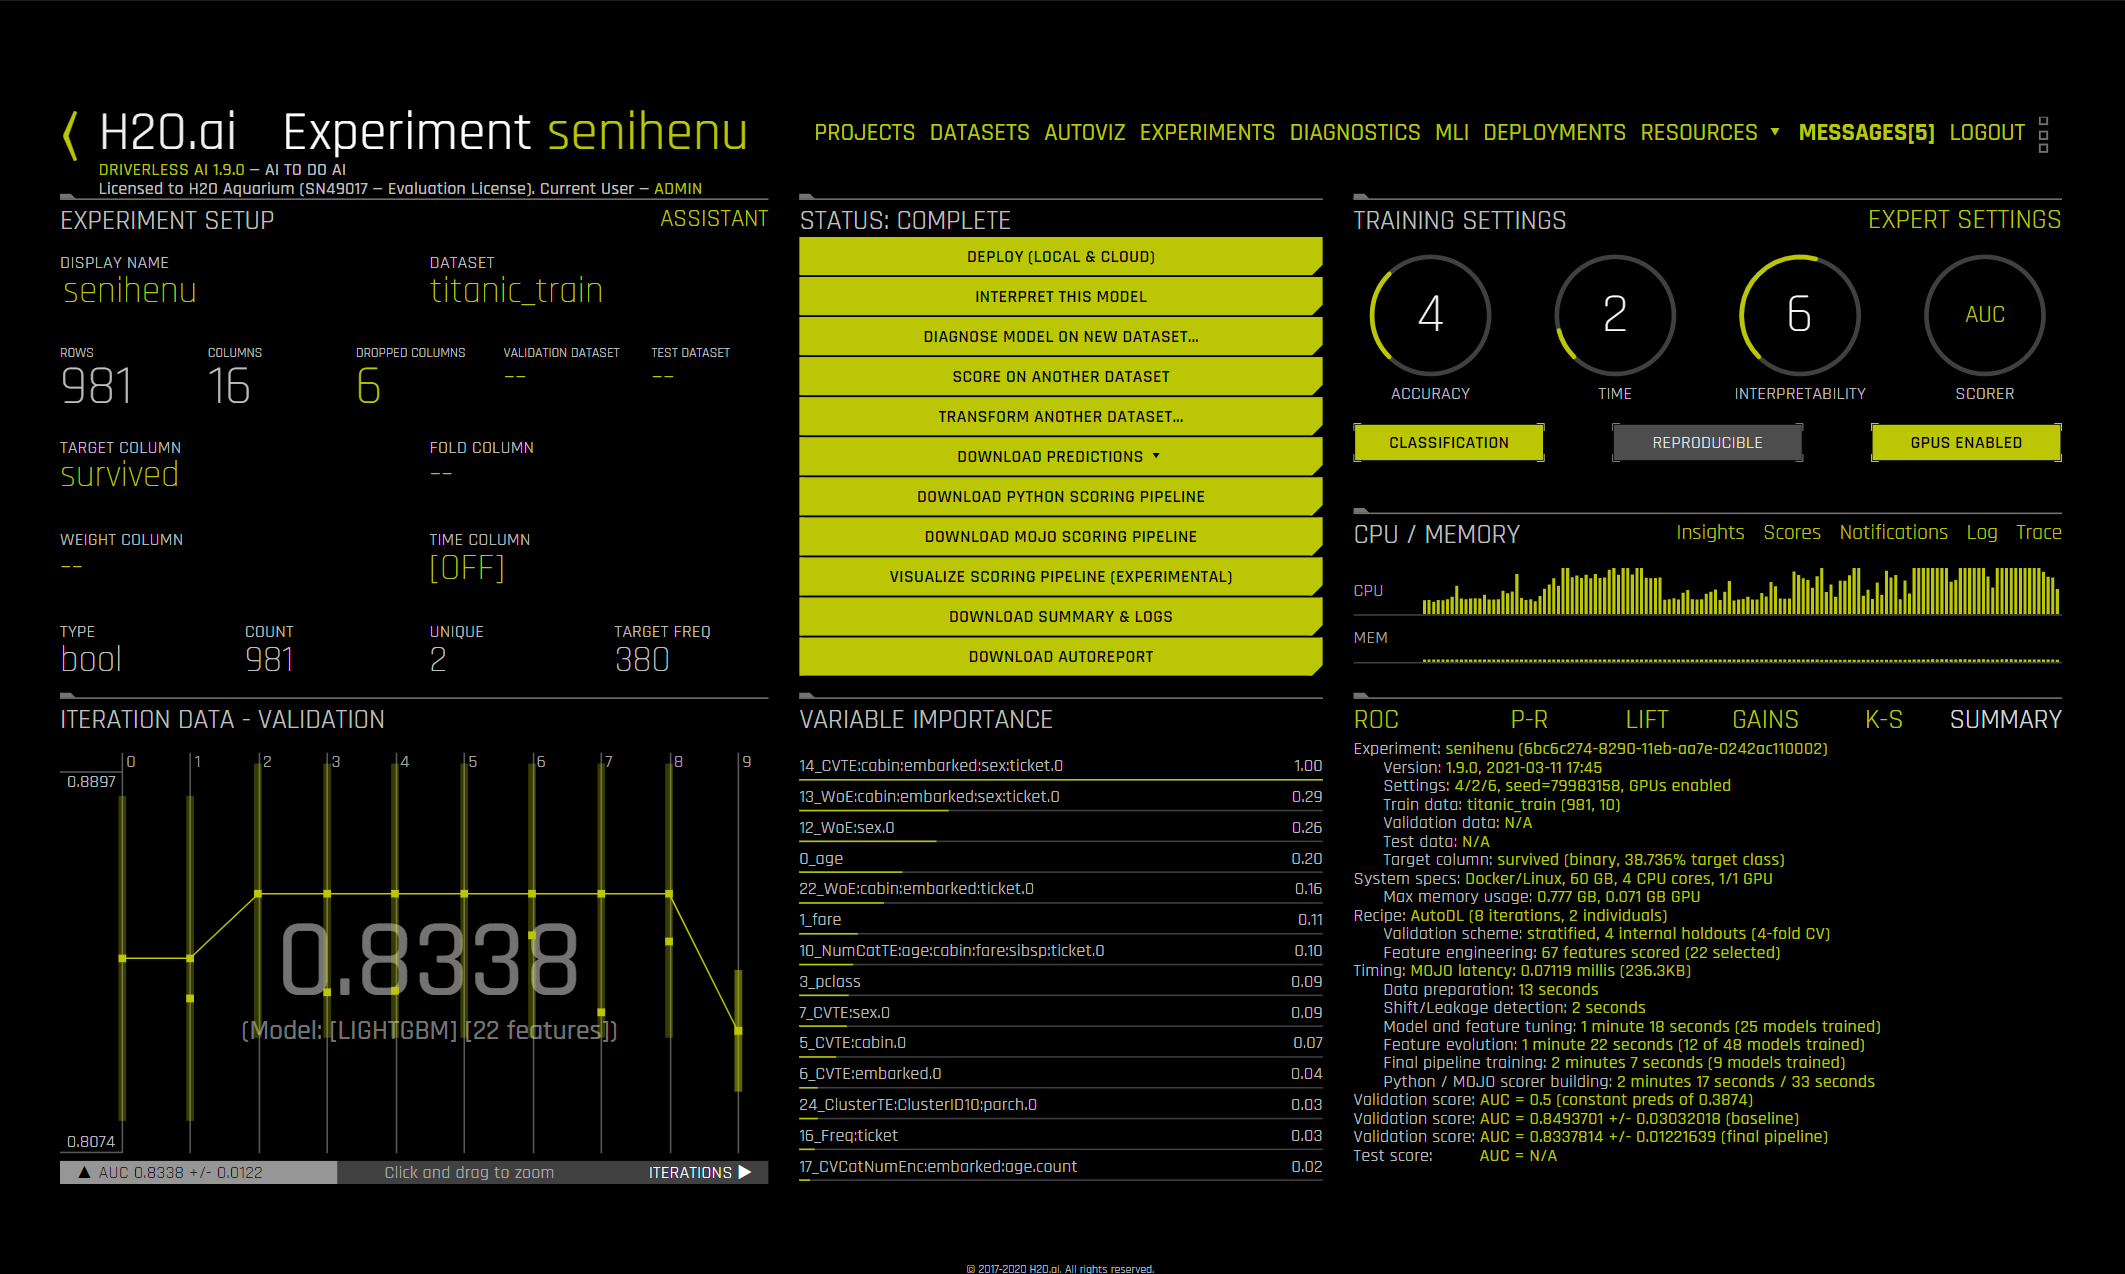

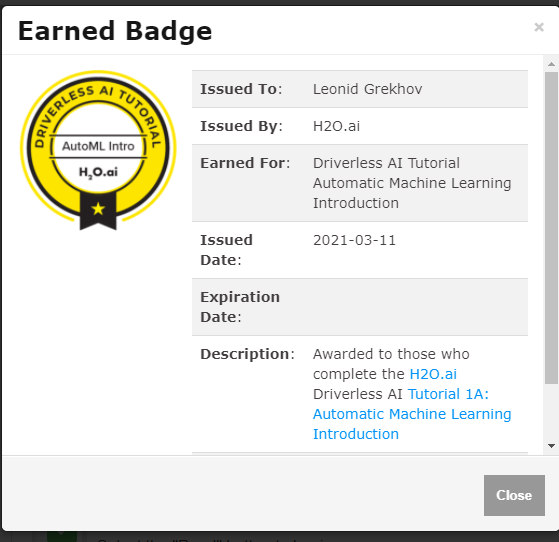